In [1]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import kanjinet_rw as kn

The kanji list for generating the kanji network: A list of all Jouyou kanji.

In [3]:
df_jouyou = pd.read_csv('data/onyomi_statistics.csv', sep='\t',names=['kanji','read'])
list_jouyou = list(df_jouyou["kanji"])

Generating the kanji network from a list of kanji with nodes (kanji) as STR. 

In [4]:
G = kn.gen_dag(kanji_list=list_jouyou, soft=True, loners=True)

Fetch kanji data from kanjidic2 (own wrapper function uses jamdict.lookup) and saves it to pandas DF.

In [5]:
iter_res = kn.get_kanji_properties(list_jouyou)

Save that to a csv file...

In [6]:
iter_res.to_csv("data/iter_data.csv")

Reading kanjidic2 fetched kanji data (containing dic properties) from csv 

In [7]:
iter_res = pd.read_csv("data/iter_data.csv")

Adding kanji properties to the graph

In [8]:
G = kn.add_kanji_properties(G, iter_res.columns[1:], iter_res)

Writing the graph to a GEXF file: 

In [15]:
kn.write_file_gexf(G,"dag_2k_soft_loner.gexf")

Reading the kanji network, kanji properties conserved thanks to GEXF file format

In [5]:
G = kn.read_file_gexf("dag_2k_soft_loner.gexf")

In [70]:
for i,j in G.nodes.items(): 
    print(i,j)
    break

一 {'literal': '一', 'stroke_count': 1, 'grade': 1.0, 'freq': 2.0, 'jlpt': 4.0, 'label': '一'}


In [7]:
pos = nx.spring_layout(G)

Saving the spring layout to csv...

In [13]:
pd.DataFrame.from_dict(pos).to_csv("data/dag_2k_soft_loner_pos.csv")

And reading it back correctly...

In [66]:
pos2 = pd.read_csv("data/dag_2k_soft_loner_pos.csv").drop('Unnamed: 0', axis=1).to_dict(orient="list")

<ipython-input-68-9e519c939ac7>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


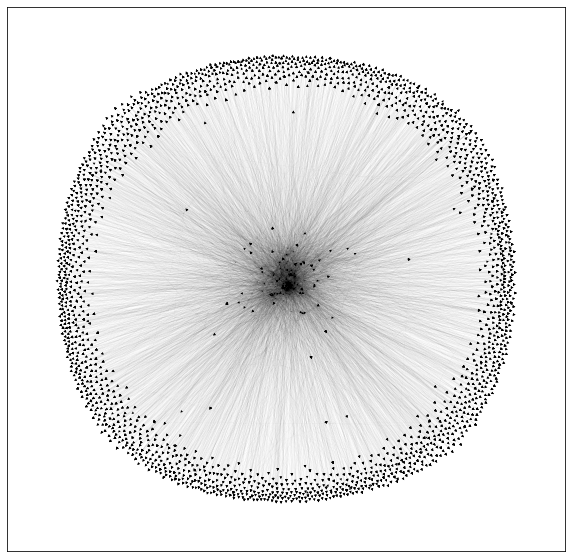

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(G, pos2, with_labels=False, arrowsize=6,font_size=13,font_family="TakaoGothic" , ax=ax, node_size=0, width=0.01)
fig.show()

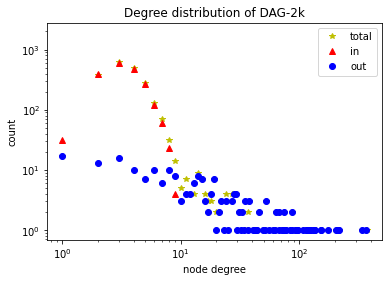

In [6]:
from collections import Counter

plt.figure()
degrees = [G.degree(n) for n in G.nodes()]
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

degree, count = zip(*sorted(dict(Counter(degrees)).items(), key=lambda tup: tup[0]))
in_degree, in_count = zip(*sorted(dict(Counter(in_degrees)).items(), key=lambda tup: tup[0]))
out_degree, out_count = zip(*sorted(dict(Counter(out_degrees)).items(), key=lambda tup: tup[0]))

plt.loglog(degree,count,'*y', label="total")
plt.loglog(in_degree,in_count,'^r', label="in")
plt.loglog(out_degree,out_count,'ob', label="out")

plt.xlabel("node degree")
plt.ylabel("count")
plt.title("Degree distribution of DAG-2k")
plt.legend()
plt.show()

Both the degree distribution and plot look correct with the generalized kanjinet_rw pipeline! 